<a href="https://colab.research.google.com/github/sandeepss2020/Computer_Vision/blob/main/CV_LAB10_COLORSEGMENTATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow

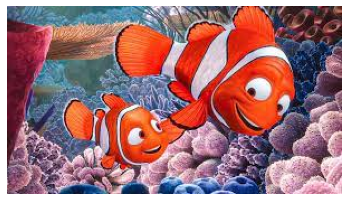

In [8]:
nemo = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Computer_Vision_dr/nemo1.jpg')
nemo = cv2.cvtColor(nemo,cv2.COLOR_BGR2RGB)
plt.imshow(nemo)
plt.axis('off')
plt.show()


In [18]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm,colors
from matplotlib.colors import hsv_to_rgb

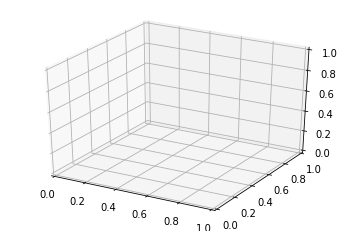

In [11]:
r, g, b = cv2.split(nemo)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

In [12]:
pixel_colors = nemo.reshape((np.shape(nemo)[0]*np.shape(nemo)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

In [33]:
axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
# plt.show()

Text(0.09379629152477457, 0.012566320283548623, 'Blue')

In [15]:
hsv_nemo = cv2.cvtColor(nemo, cv2.COLOR_RGB2HSV)

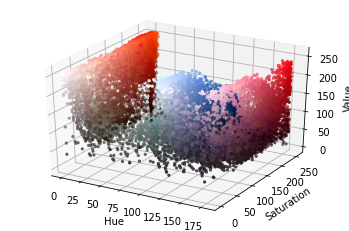

In [16]:
h, s, v = cv2.split(hsv_nemo)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

In [19]:
light_orange = (1, 190, 200)
dark_orange = (18, 255, 255)

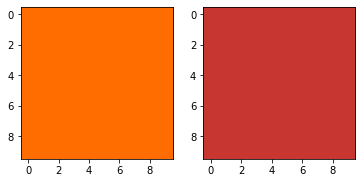

In [21]:
lo_square = np.full((10, 10, 3), light_orange, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), dark_orange, dtype=np.uint8) / 255.0
plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(lo_square))
plt.show()

In [23]:
mask = cv2.inRange(hsv_nemo, light_orange, dark_orange)
result = cv2.bitwise_and(nemo, nemo, mask=mask)

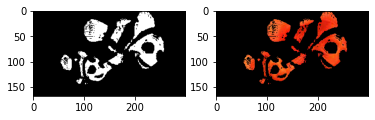

In [24]:
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

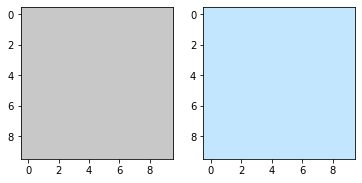

In [25]:
light_white = (0, 0, 200)
dark_white = (145, 60, 255)
lw_square = np.full((10, 10, 3), light_white, dtype=np.uint8) / 255.0
dw_square = np.full((10, 10, 3), dark_white, dtype=np.uint8) / 255.0
plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(lw_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(dw_square))
plt.show()

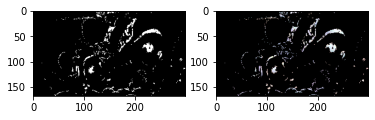

In [26]:
mask_white = cv2.inRange(hsv_nemo, light_white, dark_white)
result_white = cv2.bitwise_and(nemo, nemo, mask=mask_white)

plt.subplot(1, 2, 1)
plt.imshow(mask_white, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result_white)
plt.show()

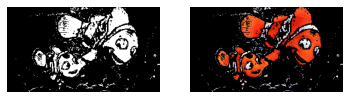

In [30]:
final_mask = mask + mask_white
final_result = cv2.bitwise_and(nemo, nemo, mask=final_mask)
plt.subplot(1, 2, 1)
plt.imshow(final_mask, cmap="gray")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(final_result)
plt.axis("off")
plt.show()


DIFFERENT APPROACH

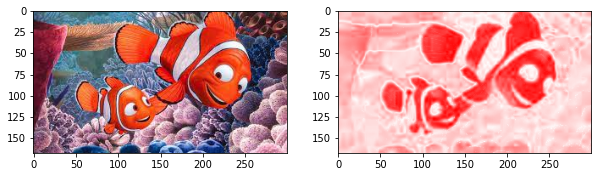

In [35]:
img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/Computer_Vision_dr/nemo1.jpg")
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

hsv_to_rgb_img = hsv_to_rgb(hsv_img)
hsv_to_rgb_img = (255 * (hsv_to_rgb_img - np.min(hsv_to_rgb_img)) / np.ptp(hsv_to_rgb_img)).astype(np.uint32)

plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(hsv_to_rgb_img)
plt.show()

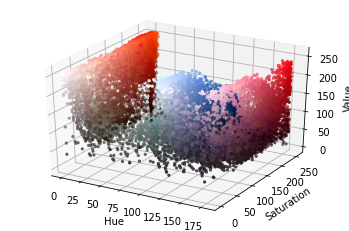

In [36]:
pixel_colors = img.reshape((np.shape(img)[0]*np.shape(img)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

h, s, v = cv2.split(hsv_img)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

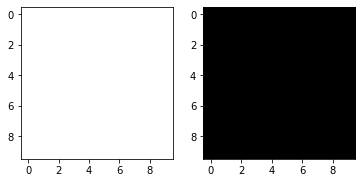

In [37]:
white = (0, 0, 255)
black = (0, 0, 0)
sq = np.full((10, 10, 3), white, dtype=np.uint8) / 255.0
sq2 = np.full((10, 10, 3), black, dtype=np.uint8) / 255.0

plt.subplot(121)
plt.imshow(hsv_to_rgb(sq))
plt.subplot(122)
plt.imshow(hsv_to_rgb(sq2))
plt.show()

In [38]:
mask = cv2.inRange(hsv_img, black, white)
print(mask)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


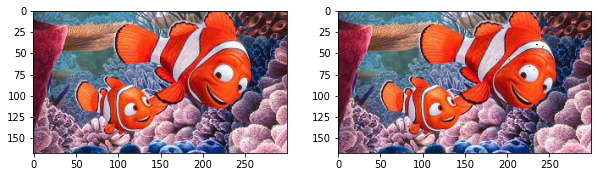

In [39]:
result = cv2.bitwise_and(img, img, mask=mask)
result = np.abs(img - result)

plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(result)
plt.show()